In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from salishsea_tools import tidetools, geo_tools, viz_tools
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import cmocean
import netCDF4 as nc
%matplotlib inline

In [4]:
grid = nc.Dataset('/data/vdo/MEOPAR/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [5]:
cs2015 = pickle.load(open('../smelt_diag/2015cs.pkl', 'rb'))
cs2016 = pickle.load(open('cs_2016_nuts.pkl', 'rb'))
cs2017 = pickle.load(open('2017cs.pkl', 'rb'))

In [6]:
cs2015.keys()

dict_keys(['cs_si', 'cs_ni', 'model_si', 'model_ni', 'datetime', 'depths', 'lat', 'lon'])

In [7]:
cs2016.keys()

dict_keys(['cs_si', 'model_si', 'cs_ni', 'model_ni', 'datetimes_n', 'datetime_s', 'depths_n', 'depths_s', 'depths_sn', 'lats_n', 'lats_s', 'lons_n', 'lons_s', 'cs_si_sn', 'model_si_sn', 'cs_ni_sn', 'model_ni_sn'])

In [8]:
cs2017.keys()

dict_keys(['cs_ni', 'cs_si', 'model_si', 'model_ni', 'datetime', 'depth', 'lat', 'lons'])

In [10]:
cs2015['lat'][cs2015['lat'] > 49.8].shape

(290,)

In [13]:
cs2016['lats_n'][cs2016['lats_n'] > 49.8].shape

(413,)

In [16]:
cs2017['lat'][cs2017['lat'] > 49.8].shape

(382,)

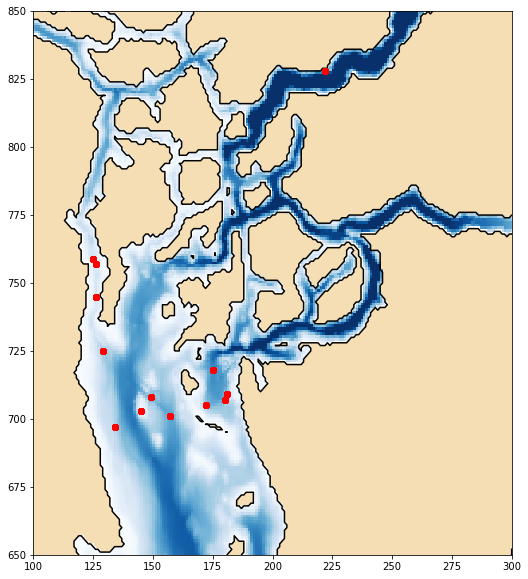

In [27]:
fig, ax = plt.subplots(figsize = (10,10))
viz_tools.set_aspect(ax)
viz_tools.plot_coastline(ax, grid)
viz_tools.plot_land_mask(ax, grid, color = 'wheat')
for lon, lat in zip(cs2015['lon'][cs2015['lat'] > 49.8], cs2015['lat'][cs2015['lat'] > 49.8]):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, 
                                                   X, Y, land_mask = bathy.mask)
    ax.plot(Xind, Yind, 'ro')
for lon, lat in zip(cs2016['lons_n'][cs2016['lats_n'] > 49.8], cs2016['lats_n'][cs2016['lats_n'] > 49.8]):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, 
                                                   X, Y, land_mask = bathy.mask)
    ax.plot(Xind, Yind, 'ro')
for lon, lat in zip(cs2017['lons'][cs2017['lat'] > 49.8], cs2017['lat'][cs2017['lat'] > 49.8]):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, 
                                                   X, Y, land_mask = bathy.mask)
    ax.plot(Xind, Yind, 'ro')
ax.pcolormesh(grid.variables['Bathymetry'][:], cmap = 'Blues')
ax.set_ylim(650, 850)
ax.set_xlim(100, 300);

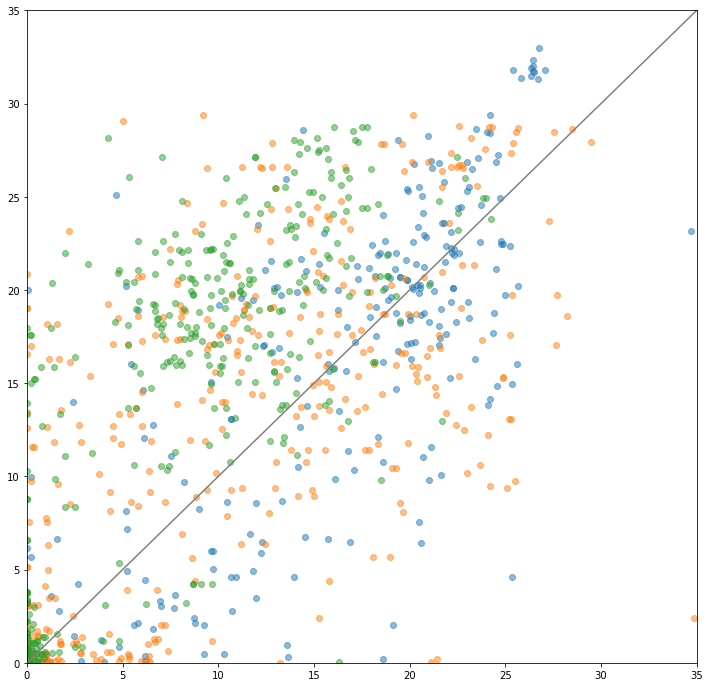

In [30]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.plot(cs2015['cs_ni'][cs2015['lat'] > 49.8], cs2015['model_ni'][cs2015['lat'] > 49.8], 
       'o', alpha = 0.5)
ax.plot(cs2016['cs_ni'][cs2016['lats_n'] > 49.8], cs2016['model_ni'][cs2016['lats_n'] > 49.8], 
       'o', alpha = 0.5)
ax.plot(cs2017['cs_ni'][cs2017['lat'] > 49.8], cs2017['model_ni'][cs2017['lat'] > 49.8], 
       'o', alpha = 0.5)
ax.plot(np.arange(50), color = 'grey')
ax.set_ylim(0,35)
ax.set_xlim(0,35);